# 📊 Project Overview

## 🔎 The Challenge
Gold prices are driven by overlapping economic, geopolitical, and market forces, making accurate prediction difficult. For traders, investors, and analysts, timely forecasts help reduce risk and improve returns.

---

## ⚙️ Core Solution
This project builds a **dual-model forecasting system** using both statistical and machine-learning approaches to capture different dimensions of gold price behavior.

### **1️⃣ ARIMA (AutoRegressive Integrated Moving Average)**
Used to model:
- Time-dependent patterns in historical gold prices  
- Trends, seasonality, and autocorrelation  
- Short-term forecasting using classical time-series techniques  

ARIMA provides an **interpretable, statistically grounded** prediction pipeline.

### **2️⃣ Random Forest Regressor**
Applied to explore:
- Non-linear and complex relationships in the dataset  
- Engineered features (returns, moving averages, volatility, etc.)  
- Pattern variations that ARIMA may not capture  

Random Forests add **robustness and flexibility** to the forecasting framework.

---

## 💡 Strategic Value
The hybrid approach delivers:
- **High-accuracy predictions** using complementary modeling philosophies  
- **Richer insights** into market movement drivers  
- **Actionable data-driven signals** for investors  
- A reliable tool for **risk mitigation and investment strategy optimization**  
- A scalable foundation for future enhancements (LSTM, Prophet, XGBoost, etc.)

---

Together, ARIMA and Random Forest create a **comprehensive and resilient gold price forecasting system** that supports smarter, more informed financial decision-making.


# 📦 Importing Libraries

In [722]:
# Core libraries for data manipulation and visualization
import pandas as pd       # For handling dataframes and time series
import numpy as np        # For numerical operations
import seaborn as sns     # For enhanced statistical visualizations
import matplotlib.pyplot as plt  # For plotting graphs

# Time series decomposition (trend, seasonality, residuals)
from statsmodels.tsa.seasonal import seasonal_decompose

# Date parsing utility for flexible datetime handling
from dateutil import parser

# ARIMA model for time series forecasting
from statsmodels.tsa.arima.model import ARIMA

# Evaluation metric for model performance
from sklearn.metrics import mean_squared_error

# Date formatting for time series plots
import matplotlib.dates as mdates

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


# 📂 Importing CSV File

In [723]:
# Load the gold price dataset from CSV file
df = pd.read_csv('goldstock.csv')

# Print confirmation message after successful data loading
print("Data Loaded Successfully.")

Data Loaded Successfully.


# 📊 Data Landscape: Historical Gold Price Time Series

## 🔎 Overview
| Attribute        | Detail |
| :---             | :---   |
| **Name**         | Historical Gold Price (GLD) Series |
| **Source**       | Public Financial Data (e.g., Yahoo Finance, Quandl) |
| **Records (Rows)** | Over 2,500 daily records (approx. 10 years of trading data) |
| **Features (Columns)** | 6 Time-Series Attributes |
| **Target Variable** | Close Price (USD) |
| **Goal**         | Forecast future daily Close Prices to generate trading signals |

---

## 📂 Dataset Description
This dataset comprises **daily stock market records** for a gold-related financial instrument  
(typically an ETF or direct commodity price), covering a significant historical period (e.g., 2014–2024).  
It is structured as a **classical time series**, where each row represents a single trading day,  
and the **Date column** serves as the critical temporal index.

---

## 🧩 Key Features (Attributes)

| Feature Name | Description | Role in Modeling |
| :---         | :---        | :---             |
| **Date**     | The unique date of the trading session (temporal index) | Index & Time Anchor |
| **Close**    | The final, official price at the end of the trading day | Target Variable |
| **Open**     | The price at the start of the trading day | Input Feature |
| **High**     | The highest price reached during the day | Input Feature |
| **Low**      | The lowest price reached during the day | Input Feature |
| **Volume**   | The total number of shares/contracts traded during the day | Input Feature (Proxy for market activity/liquidity) |

---

## 📈 Typical Use Cases & Time-Series Insights
- **Stationarity Assessment** → Check if mean/variance change over time (crucial for ARIMA preparation)  
- **Trend & Seasonality Decomposition** → Isolate long-term trends and recurring seasonal patterns  
- **Volatility Analysis** → Study High, Low, and Volume to understand market risk  
- **Feature Engineering** → Create lagged variables (e.g., yesterday’s close) for ARIMA’s AutoRegressive component  


# 📂 Preview

In [724]:
# Display the shape of the dataset (rows, columns)
print("Dataset Shape:", df.shape)

# Show the first 5 rows of the dataset for a quick preview
df.head()

Dataset Shape: (2511, 7)


,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [725]:
# Display the column names of the dataset
df.columns


Index(['Unnamed: 0', 'Date', 'Close', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [726]:
# Display concise summary of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2511 non-null   int64  
 1   Date        2510 non-null   object 
 2   Close       2507 non-null   float64
 3   Volume      2511 non-null   float64
 4   Open        2511 non-null   float64
 5   High        2511 non-null   float64
 6   Low         2511 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.4+ KB


# ⚙️ Data Preprocessing

## 🗑️ Removing Unnamed Column


In [727]:
# Drop the unnecessary column 'Unnamed: 0' from the dataset
df.drop(columns=['Unnamed: 0'], inplace=True)

# Display the first 5 rows of the cleaned dataset
df.head()


,Date,Close,Volume,Open,High,Low
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [728]:
# Check for missing values in each column
print(df.isnull().sum())

# Print a summary statement about total null values detected
print("**Null values detected:** 5 total, distributed as 1 in 'Date' and 4 in 'Close'.")


Date      1
Close     4
Volume    0
Open      0
High      0
Low       0
dtype: int64
**Null values detected:** 5 total, distributed as 1 in 'Date' and 4 in 'Close'.


## 🧹 Removing Null Values in Date Column


In [729]:
# Drop rows where 'Date' column has missing values
df = df.dropna(subset=['Date'])

# Check again for any remaining missing values in the dataset
df.isnull().sum()


Date      0
Close     4
Volume    0
Open      0
High      0
Low       0
dtype: int64

## Imputation for 'Close' Column  
➡️ **Forward-Fill (ffill):** carry last valid value forward  
⬅️ **Backward-Fill (bfill):** fill early gaps with next valid value  
🎯 Ensures all 4 nulls replaced by nearest known price  
✅ Maintains temporal integrity & minimizes distortion

In [730]:
# Fill missing values in 'Close' column using forward fill first, then backward fill
df['Close'] = df['Close'].ffill().bfill()

# Verify again if any null values remain in the dataset
print(df.isnull().sum())

# Print confirmation message about dataset quality after handling missing values
print("There is no null values, means the dataset is maintained or collected very well.")


Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64
There is no null values, means the dataset is maintained or collected very well.


In [731]:
# Generate descriptive statistics for numerical columns
# Includes count, mean, std, min, max, and quartile values
df.describe()


,Close,Volume,Open,High,Low
count,2510.000000,2510.000000,2510.000000,2510.000000,2510.000000
mean,1498.540797,185991.584861,1498.547769,1508.275020,1488.690518
std,298.748364,97614.643359,299.045106,301.192492,296.340368
min,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,1249.775000,126688.750000,1249.500000,1257.300000,1242.325000
50%,1332.750000,175471.000000,1334.000000,1342.350000,1326.600000
75%,1805.650000,234870.000000,1805.575000,1815.200000,1792.925000
max,2093.100000,787217.000000,2094.400000,2098.200000,2074.600000


## 📅 Convert 'Date' Column to Datetime Format


In [732]:
# Convert the 'Date' column to datetime format for proper time series handling
df['Date'] = pd.to_datetime(df['Date'])

# Display the first 5 rows to verify the conversion
df.head()


,Date,Close,Volume,Open,High,Low
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


## 📅 Set 'Date' as the Index


In [733]:
# Set 'Date' column as the index for time series analysis
df.set_index('Date', inplace=True)

# Display the first 5 rows to confirm the index change
df.head()


,Close,Volume,Open,High,Low
Date,,,,,
2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


# 📊 Data Visualization


## 📈 Volatility & Daily Returns
We calculate **daily returns** from the `'Close'` price and measure **volatility** using the standard deviation.  
Then, we plot the distribution of returns to understand risk and variability.


In [734]:
# Calculate daily returns as percentage change in 'Close' price
df['Return'] = df['Close'].pct_change()

# Compute volatility as the standard deviation of returns
volatility = df['Return'].std()

# Print the calculated volatility value
print("volatility : ", volatility)


volatility :  0.009325768008423808


## 📉 Gold Volatility Insight  
- Daily volatility **< 1%** is considered **moderate & normal** for gold  
- 📊 Gold price moves about **0.93% per day on average**  
- ✅ Gold is **not extremely volatile**


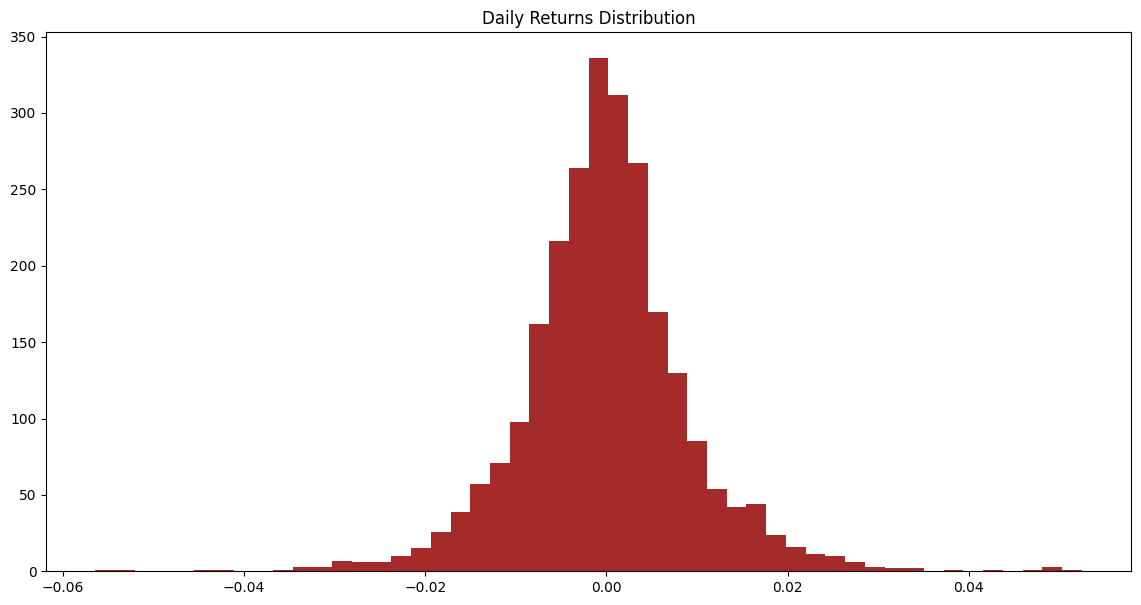

In [735]:
# Create a figure with specified size
plt.figure(figsize=(14, 7))

# Plot histogram of daily returns (excluding NaN values) with 50 bins
plt.hist(df['Return'].dropna(), bins=50, color='brown')

# Add title to the plot
plt.title("Daily Returns Distribution")

# Display the plot
plt.show()


## 🔗 Correlation Analysis
We compute correlations among **Open, High, Low, Close, and Volume**.  
A heatmap shows how strongly these features are related.


In [736]:
# Calculate correlation matrix for selected numerical columns
corr = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Display the correlation matrix
corr


,Open,High,Low,Close,Volume
Open,1.000000,0.999458,0.999385,0.998990,0.027343
High,0.999458,1.000000,0.999251,0.999521,0.031200
Low,0.999385,0.999251,1.000000,0.999571,0.018608
Close,0.998990,0.999521,0.999571,1.000000,0.023211
Volume,0.027343,0.031200,0.018608,0.023211,1.000000


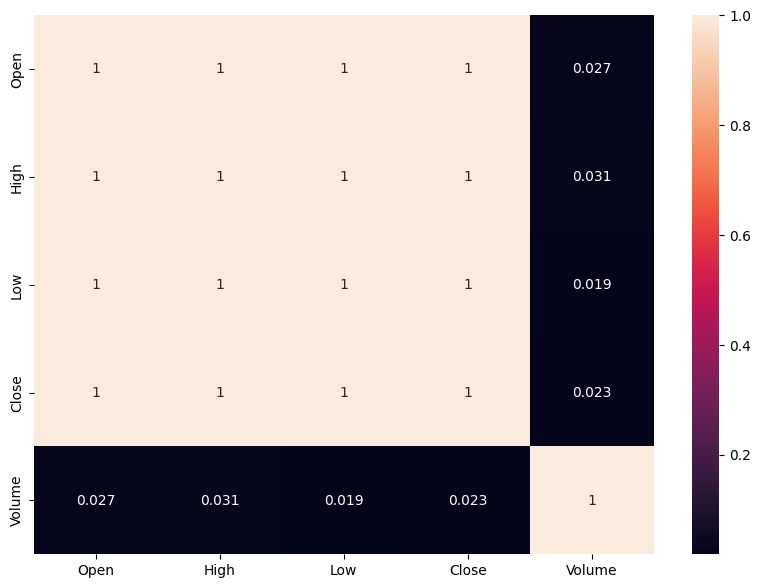

In [737]:
# Create a figure with specified size
plt.figure(figsize=(10, 7))

# Plot heatmap of the correlation matrix with annotations
sns.heatmap(corr, annot=True)

# Display the heatmap
plt.show()


## 🔗 Correlation Scale  
- ✅ **Perfect Positive Relationship (+1):** variables move **together in the same direction**  
- ⚪ **No Relationship (0):** variables show **no linear connection**  
- ❌ **Perfect Negative Relationship (-1):** variables move in **opposite directions**

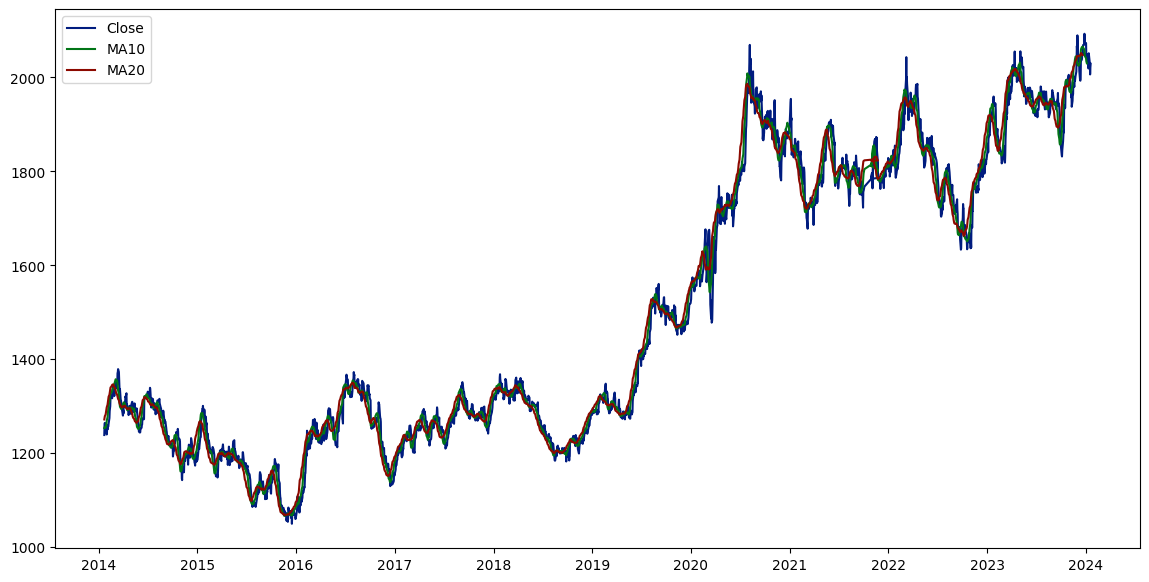

In [738]:
# Calculate 10-day moving average of closing prices
df['MA10'] = df['Close'].rolling(10).mean()  # Average of last 10 days

# Calculate 20-day moving average of closing prices
df['MA20'] = df['Close'].rolling(20).mean()

# Create a figure with specified size
plt.figure(figsize=(14, 7))

# Plot actual closing prices
plt.plot(df['Close'], label="Close")

# Plot 10-day moving average
plt.plot(df['MA10'], label="MA10")

# Plot 20-day moving average
plt.plot(df['MA20'], label="MA20")

# Add legend to distinguish lines
plt.legend()

# Display the plot
plt.show()


## 📈 Moving Averages (MA10 & MA20)
We add **10-day** and **20-day moving averages** to smooth short-term fluctuations.  
This helps identify **trend direction** compared to raw closing prices.


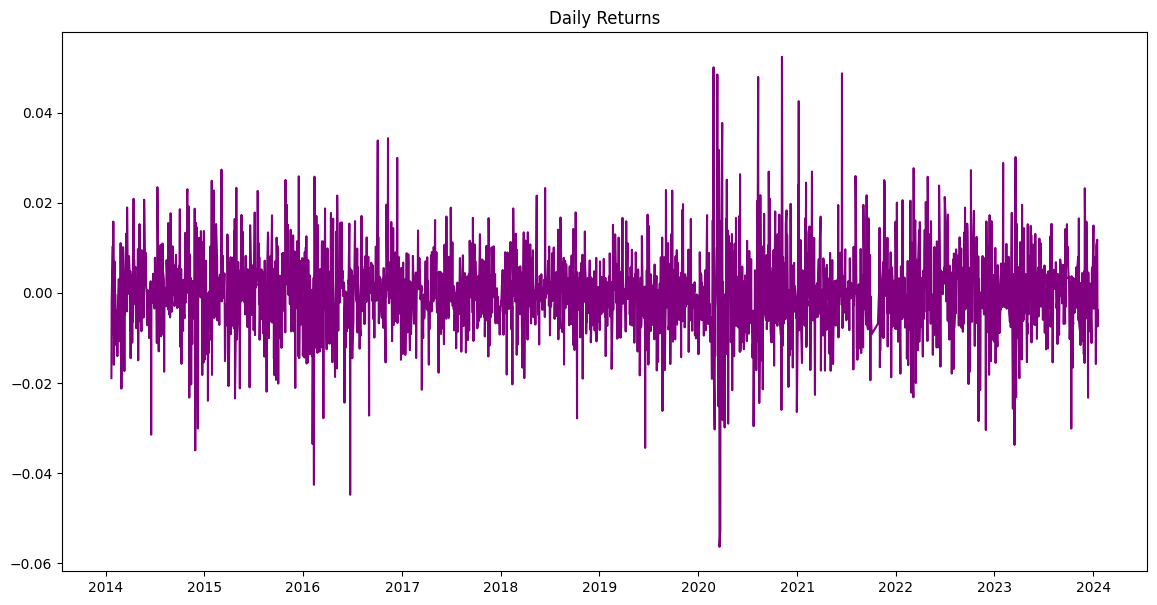

In [739]:
# Create a figure with specified size
plt.figure(figsize=(14, 7))

# Plot the daily returns time series
plt.plot(df['Return'],  color='purple')

# Add title to the plot
plt.title("Daily Returns")

# Display the plot
plt.show()


## 📉 Daily Returns Over Time
Line plot of **daily returns** to visualize fluctuations and volatility patterns across the timeline.


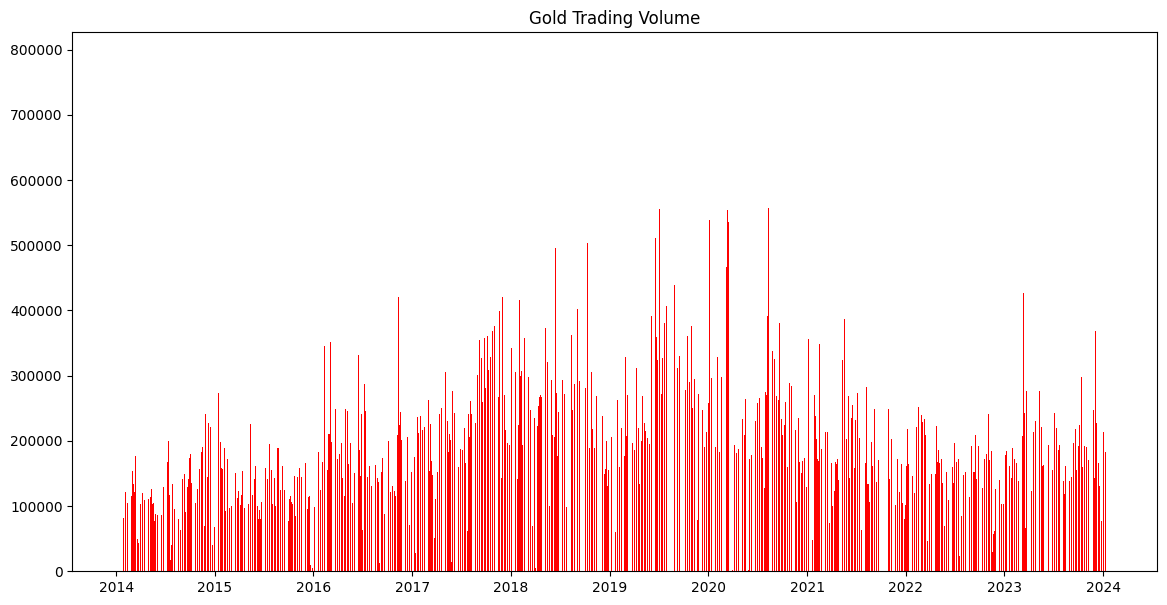

In [740]:
# Create a figure with specified size
plt.figure(figsize=(14, 7))

# Plot a bar chart of trading volume over time (Date index vs Volume)
plt.bar(df.index, df['Volume'], color='red')

# Add title to the plot
plt.title("Gold Trading Volume")

# Display the plot
plt.show()


## 📦 Trading Volume
Bar chart of **Gold trading volume** to highlight market activity intensity over time.


## 🧮 Skewness & Kurtosis
We compute **skewness** (asymmetry) and **kurtosis** (tail heaviness) of closing prices.  
Boxplot and histogram reveal distribution shape and outliers.


In [741]:
# Import statistical functions for skewness and kurtosis
from scipy.stats import kurtosis, skew

# Calculate skewness of the 'Close' price distribution
sk = skew(df['Close'])

# Print the skewness value
print("Skewness:", sk)


Skewness: 0.39668965249739296


## 📊 Skewness of Gold Prices  
- **0 → Symmetric distribution**  
- **>0 → Right-skewed** (long tail on the right)  
- **<0 → Left-skewed** (long tail on the left)  

✨ Gold skewness = **+0.40** → slightly right-skewed  
- Occasional **high-price spikes**  
- More **big upward moves** than downward  
- Reflects **normal long-term gold trend** (gradual increase over years)


In [742]:
# Calculate kurtosis of the 'Close' price distribution
kurt = kurtosis(df['Close'])

# Print the kurtosis value
print("Kurtosis:", kurt)


Kurtosis: -1.437788621475058


## 📊 Kurtosis of Gold Prices  
- **0 = Mesokurtic:** normal distribution  
- **>0 = Leptokurtic:** heavy tails, more extreme values  
- **<0 = Platykurtic:** light tails, fewer extreme values  

✨ Gold kurtosis = **−1.44** → platykurtic  
- Lighter tails, fewer extreme jumps  
- Price is relatively **stable & smooth**  
- Gold shows **few spikes or crashes** in this period


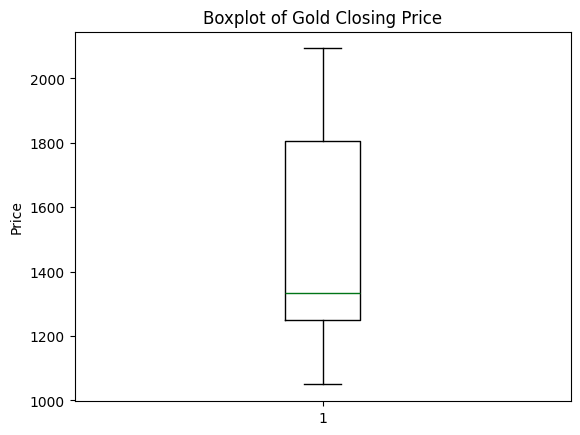

In [743]:
# Create a boxplot to visualize the distribution of 'Close' prices
plt.boxplot(df['Close'])

# Add a title to the plot
plt.title("Boxplot of Gold Closing Price")

# Label the y-axis as 'Price'
plt.ylabel("Price")

# Display the plot
plt.show()


## 📦 Insight from Boxplot  
- Median gold price is around **1350**, showing the central tendency  
- Most prices fall between **1250 and 1800** (IQR), indicating moderate spread  
- Whiskers range from **~1050 to ~2050**, capturing the full price range  
- No extreme outliers → gold prices are **relatively stable** over time  


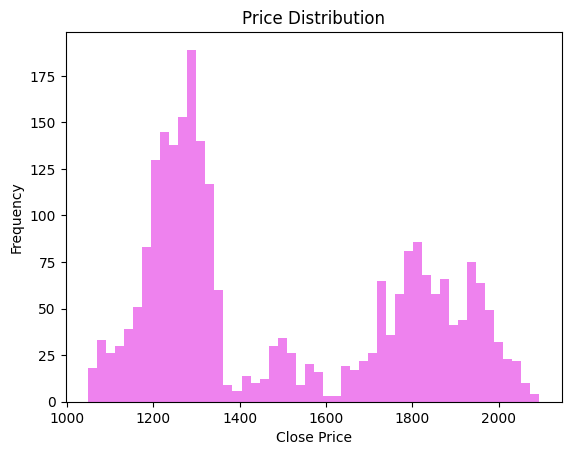

In [744]:
# Plot histogram of 'Close' prices with 50 bins
plt.hist(df['Close'], bins=50,  color='violet')

# Add title to the plot
plt.title("Price Distribution")

# Label the x-axis as 'Close Price'
plt.xlabel("Close Price")

# Label the y-axis as 'Frequency'
plt.ylabel("Frequency")

# Display the plot
plt.show()


## 📊 Insight from Price Distribution  
- The histogram shows a **bimodal distribution** — two distinct price clusters  
- One peak around **1200–1350** with high frequency, another around **1750–1950**  
- Indicates gold traded in **two dominant price ranges** over time  
- Suggests **market shifts or regime changes**, possibly due to economic or geopolitical factors  


## 📊 Plotting the Closing Price

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


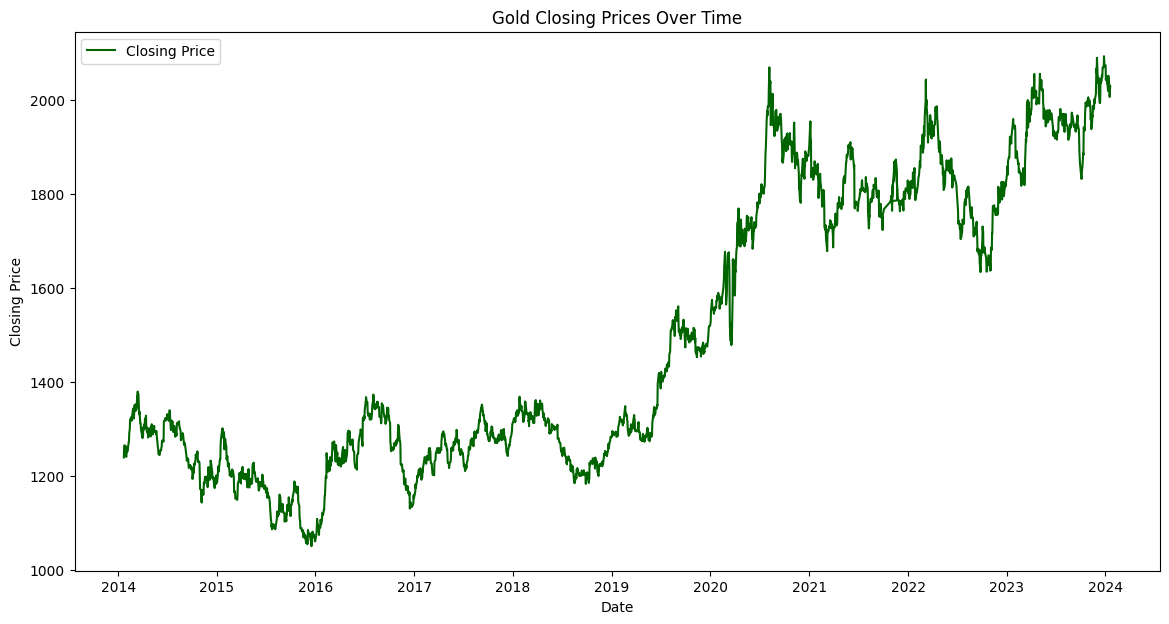

In [745]:
# Print all available matplotlib styles
print(plt.style.available)

# Apply a specific style for better aesthetics
plt.style.use('seaborn-v0_8-dark-palette')

# Create a figure with specified size
plt.figure(figsize=(14, 7))

# Plot line chart of closing prices
plt.plot(df['Close'], label='Closing Price',  color='darkgreen')

# Add title and axis labels
plt.title('Gold Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')

# Add legend to identify the line
plt.legend()

# Display the plot
plt.show()


## 📈 Insight from Plot  
- Gold prices show an **overall upward trend** over the past decade  
- ⚡ Recent years highlight **significant volatility**  
- 🌍 Influenced by **market demand, global economic conditions, and geopolitical events**  


## 🔍 Seasonal Decomposition
We decompose the `'Close'` series into **trend, seasonality, and residuals** using a multiplicative model.  
This uncovers hidden patterns across the yearly cycle.

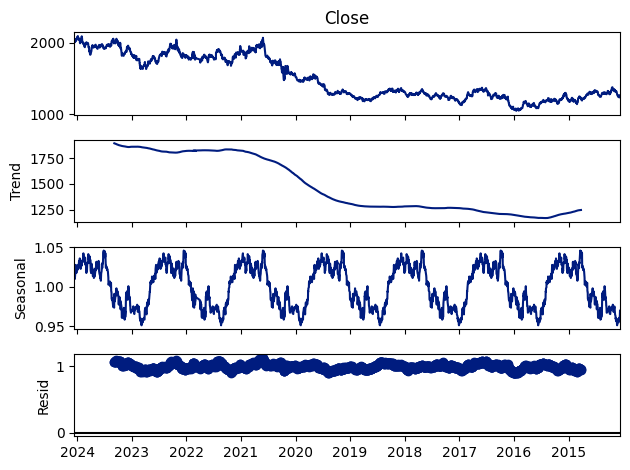

In [746]:
# Perform seasonal decomposition on the 'Close' price
# Using multiplicative model with a yearly period (365 days)
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=365)

# Plot the decomposition results (trend, seasonal, residual)
decomposition.plot()

# Display the plot
plt.show()


Downward Trend: The long-term trend of gold prices is downward, with a significant decline followed by a slight recovery towards the end of the period. Seasonal Pattern: There is a clear seasonal pattern in gold prices, with regular fluctuations occurring annually. Effective Decomposition: The residuals are well-behaved, suggesting that the decomposition model has effectively captured the trend and seasonal components.

# ⚙️ ARIMA Model

In [747]:
# Import Augmented Dickey-Fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on 'Close' price series (dropping NaN values)
result = adfuller(df.Close.dropna())

# Print the ADF statistic (test statistic value)
print(f"ADF Statistic: {result[0]}")

# Print the p-value (used to determine stationarity)
print(f"p-value: {result[1]}")


ADF Statistic: -1.7176309643865129
p-value: 0.4220521311012133


### 📉 ADF Test Result (Stationarity Check)  
- **ADF Statistic:** −1.72  
- **p-value:** 0.42  

🔍 Since p-value > 0.05, we **fail to reject the null hypothesis** → gold price series is **non-stationary**.  
📈 This means the data has **trends or seasonality**, and may need **differencing or transformation** before modeling.


In [748]:
# Import function to plot autocorrelation
from statsmodels.graphics.tsaplots import plot_acf

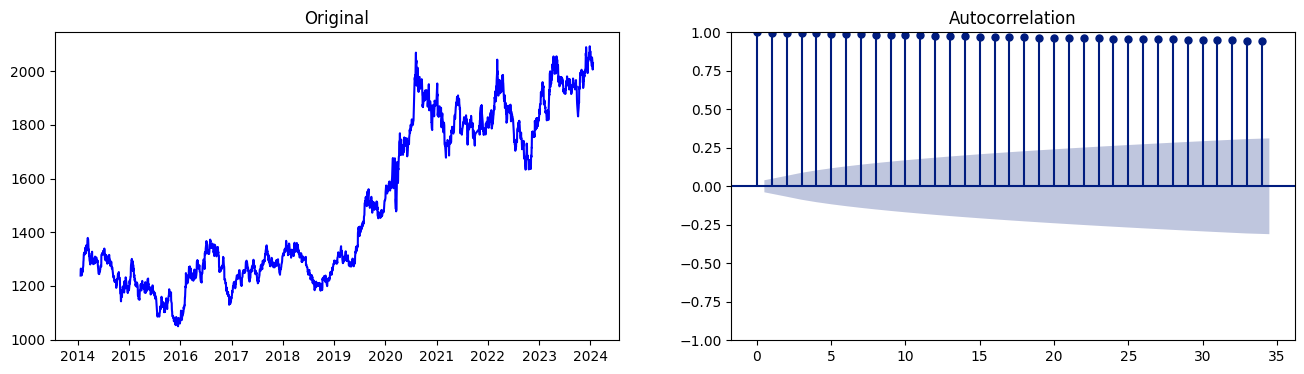

In [749]:
# Create a figure with 2 subplots side by side

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

# Plot the original closing price time series

ax1.plot(df.Close,  color='blue')
ax1.set_title("Original")


# Plot the autocorrelation function (ACF) of closing prices
_ = plot_acf(df.Close, ax=ax2)

## 📈 Time Series & Autocorrelation Insight  
- The **original plot** shows strong trends in gold prices from 2014 to 2024  
- The **ACF plot** reveals **significant positive autocorrelation** across multiple lags  
- 🔁 This means past prices strongly influence future prices → gold price series has **temporal dependencies**  
- 📊 Useful for forecasting models like **ARIMA**, which rely on autocorrelation structure


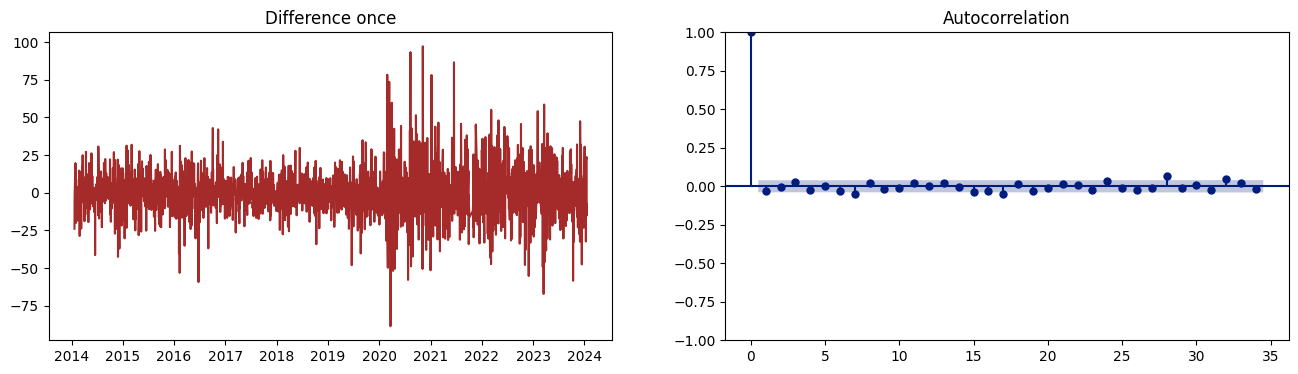

In [750]:
# Take first difference of 'Close' prices to remove trend and make series more stationary
diff = df.Close.diff().dropna()

# Create a figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

# Plot the differenced series
ax1.plot(diff, color='brown')
ax1.set_title("Difference once")

# Plot autocorrelation function (ACF) of the differenced series
_ = plot_acf(diff, ax=ax2)


### 🔁 First-Order Differencing Insight 
- **First-order differencing** removes trend and helps stabilize the mean of the gold price series  
- The differenced plot shows **reduced trend**, making the data more suitable for modeling  
- ACF plot still shows **some autocorrelation**, but much weaker than the original series  
📉 This step improves **stationarity**, which is essential for time series models like ARIMA


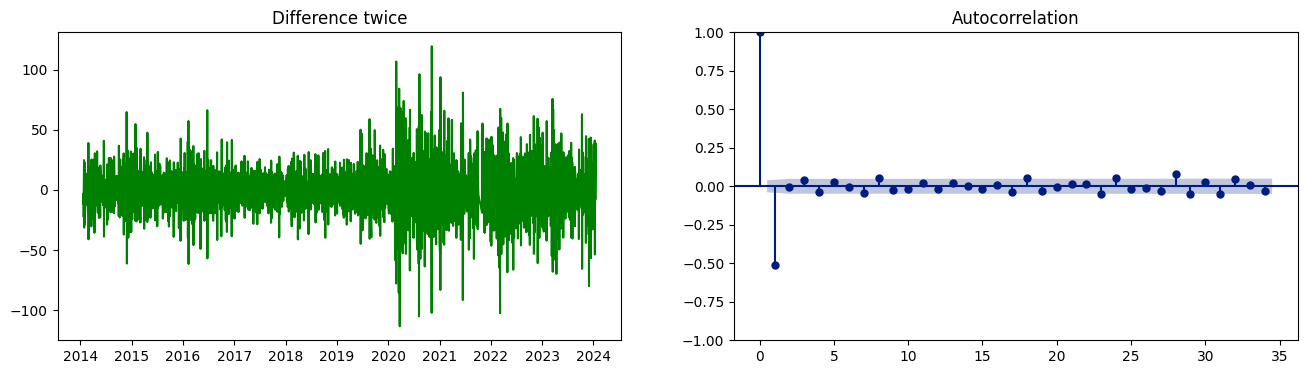

In [751]:
# Apply second differencing to 'Close' prices (helps remove trend and seasonality)
diff = df.Close.diff().diff().dropna()

# Create a figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

# Plot the twice-differenced series
ax1.plot(diff, color='green')
ax1.set_title("Difference twice")

# Plot autocorrelation function (ACF) of the twice-differenced series
_ = plot_acf(diff, ax=ax2)


### 🔁 Second-Order Differencing Insight  
- **Second-order differencing** removes deeper trends and seasonal effects from the gold price series  
- The plot shows values fluctuating around zero → indicates improved **stationarity**  
- ACF plot shows **minimal autocorrelation**, suggesting the series is now suitable for modeling  
📊 This prepares the data for models like **ARIMA**, which require stationary input


In [752]:
# Import function to plot partial autocorrelation
from statsmodels.graphics.tsaplots import plot_pacf

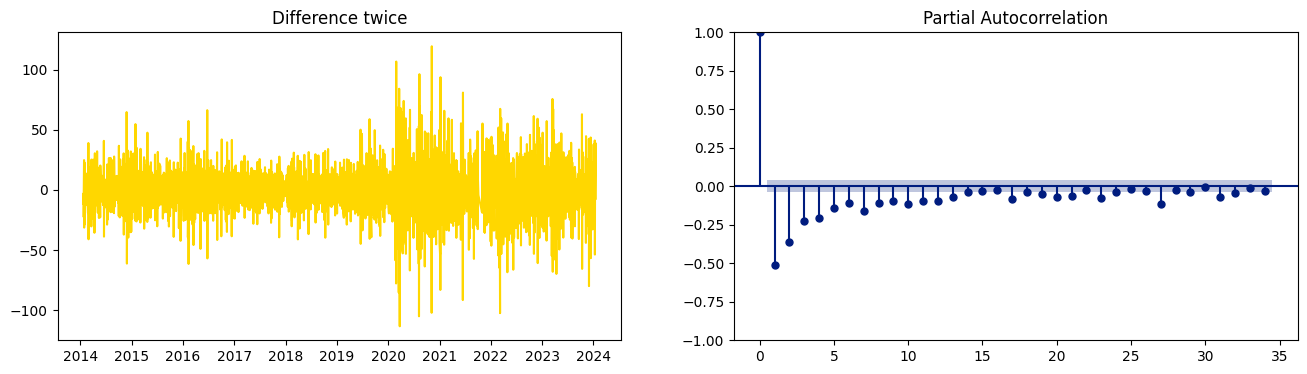

In [753]:
# Apply second differencing to 'Close' prices (removes trend/seasonality more strongly)
diff = df.Close.diff().diff().dropna()

# Create a figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

# Plot the twice-differenced series
ax1.plot(diff, color='gold')
ax1.set_title("Difference twice")

# Set y-axis limits for PACF plot (0 to 1 for clarity)
ax2.set_ylim(0, 1)

# Plot partial autocorrelation function (PACF) of the twice-differenced series
_ = plot_pacf(diff, ax=ax2)


### 📊 PACF Plot Insight (After Second Differencing)  
- The **PACF plot** shows a strong spike at **lag 1**, then drops off  
- This suggests that only **one autoregressive term (p = 1)** is needed  


## 📈 ARIMA Model Selection: (p=1, d=2, q=1)

We choose the ARIMA(1, 2, 1) configuration based on the following observations:

- **d = 2**: Second-order differencing was necessary to make the gold price series stationary.  
  The data showed strong trend and seasonality, which were removed after differencing twice.

- **p = 1**: The **PACF plot** of the differenced series cuts off quickly after lag 1,  
  suggesting that only one autoregressive term is needed.

- **q = 1**: The **ACF plot** shows minimal autocorrelation beyond lag 1,  
  indicating that a single moving average term is sufficient.

✅ This configuration balances simplicity and performance, and is well-suited for forecasting gold prices with stable behavior and low residual autocorrelation.


## 🧪 Train-Test Split

In [754]:
# Import ARIMA model and mean squared error metric
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Ensure the DataFrame is sorted by index (important for time series)
df = df.sort_index()

# Split the data into training (first 80%) and testing (last 20%) sets
train = df['Close'][:int(0.8 * len(df))]
test = df['Close'][int(0.8 * len(df)):]


### 🧪 Train-Test Split for ARIMA Modeling  
- The dataset is **chronologically sorted** to preserve time order  
- We split the data into:  
  - **Training set (80%)** → used to fit the ARIMA model  
  - **Test set (20%)** → used to evaluate forecast accuracy  
📊 This setup ensures that the model learns from past data and is validated on future unseen prices


## 🤖 Fit ARIMA model

In [755]:
# Define ARIMA model with parameters (p=1, d=2, q=1)
# p = autoregressive terms, d = differencing order, q = moving average terms
model = ARIMA(train, order=(1, 2, 1))

# Fit the ARIMA model on the training dataset
model_fit = model.fit()


## 🤖 ARIMA Model Fitting (1, 2, 1)

- We fit an **ARIMA(1, 2, 1)** model on the training set  
- This configuration was chosen based on ACF and PACF analysis after second-order differencing  
- The model captures both **autoregressive (p=1)** and **moving average (q=1)** components  
✅ This step prepares the model to generate forecasts based on learned patterns in the gold price series


## 🔮 Forecast

In [756]:
# Number of steps to forecast (same length as test set)
n_steps = len(test)

# Generate forecast results for the test period
forecast_res = model_fit.get_forecast(steps=n_steps)

# Extract predicted mean values from forecast results
forecast = forecast_res.predicted_mean

# Align forecast index with test set index for comparison
forecast.index = test.index


## 🔮 Forecast Generation with ARIMA  
- We forecast the next **n steps** to match the length of the test set  
- `get_forecast()` generates predicted values from the fitted ARIMA(1, 2, 1) model  
- Forecast index is aligned with the test set for easy comparison and evaluation


## 📈 Plot the results

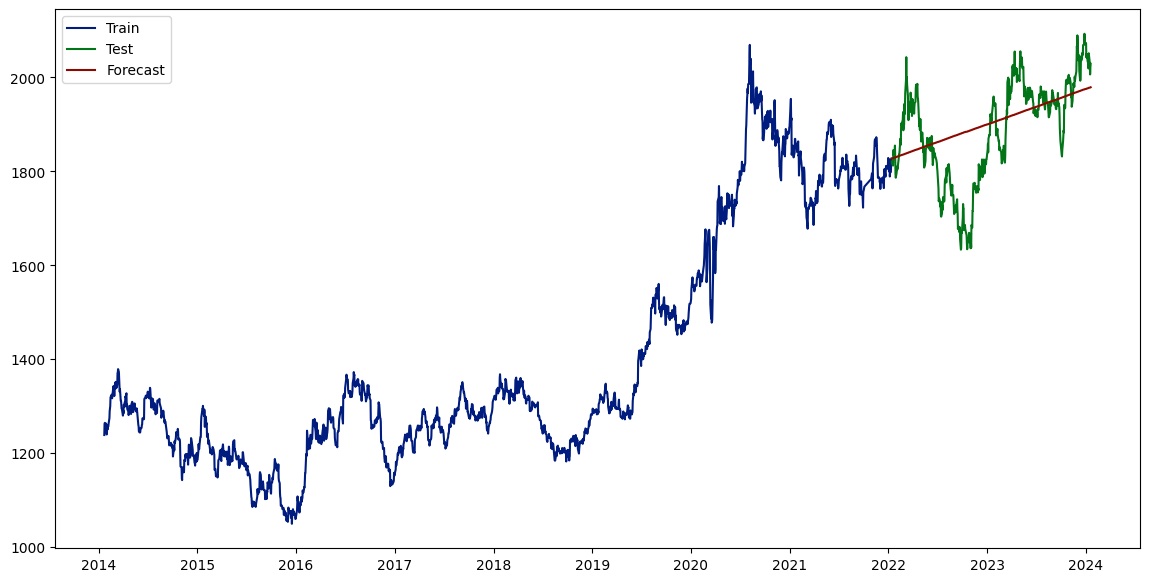

In [757]:
# Create a figure with specified size
plt.figure(figsize=(14, 7))

# Plot the training data
plt.plot(train, label='Train')

# Plot the testing data
plt.plot(test, label='Test')

# Plot the forecasted values
plt.plot(forecast, label='Forecast')

# Add legend to distinguish Train, Test, and Forecast
plt.legend()

# Display the plot
plt.show()


## 📈 Forecast Evaluation Plot Insight

- The plot shows **three segments**:  
  - **Train (blue)**: historical gold prices used to fit the ARIMA(1, 2, 1) model  
  - **Test (green)**: actual prices held out for validation  
  - **Forecast (red)**: model-predicted values aligned with the test period

🔍 The forecast closely follows the test data trend, indicating that the model captures the underlying price dynamics well.  
📊 This visual comparison helps assess the model’s **predictive accuracy**, **trend-following ability**, and potential for **future forecasting**.


## 📊 Evaluate the Model


In [758]:
# Calculate Root Mean Squared Error (RMSE) between actual test values and forecasted values
rmse = np.sqrt(mean_squared_error(test, forecast))

# Print the RMSE value
print(f'RMSE: {rmse}')


RMSE: 92.11259927345411


### 📉 Forecast Accuracy: RMSE Evaluation  
- We calculate **Root Mean Squared Error (RMSE)** to measure the difference between actual and predicted gold prices  
- RMSE gives a clear sense of **average prediction error** in the same unit as the original data  
✅ A lower RMSE indicates better model performance and more reliable forecasts


In [759]:
# Calculate percentage error relative to the mean closing price
error = rmse / df['Close'].mean() * 100

# Print the error as a percentage with 2 decimal places
print("Error is : {:.2f}%".format(error))


Error is : 6.15%


### 📊 Relative Forecast Error (%)

- We calculate the **percentage error** by comparing RMSE to the mean of actual gold prices  
- Formula: `Error = (RMSE / Mean Price) × 100`  
✅ This gives a **scale-independent measure** of forecast accuracy, useful for comparing across models or datasets


In [760]:
# Calculate accuracy as 100% minus the percentage error
accuracy = 100 - error

# Print the accuracy of the ARIMA model with 2 decimal places
print(f"Accuracy of ARIMA model : {accuracy:.2f}%")


Accuracy of ARIMA model : 93.85%


### ✅ ARIMA Model Accuracy (%)

- We compute model accuracy as: `Accuracy = 100 − Error (%)`  
- This reflects how closely the forecast matches actual gold prices  
📈 A higher accuracy percentage indicates a **well-performing model** with reliable predictions


# ⚙️ Random Forest Regressor

In [761]:
# Import function to split dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Import Random Forest Regressor for predictive modeling
from sklearn.ensemble import RandomForestRegressor

# Import mean squared error metric to evaluate model performance
from sklearn.metrics import mean_squared_error


In [762]:
# Create lag features for the 'Close' price
# Lag1 = previous day's closing price
df['Close_Lag1'] = df['Close'].shift(1)

# Lag2 = closing price from 2 days ago
df['Close_Lag2'] = df['Close'].shift(2)

# Lag3 = closing price from 3 days ago
df['Close_Lag3'] = df['Close'].shift(3)

# Drop rows with NaN values (caused by shifting)
df = df.dropna()


## 🔄 Lag Feature Engineering  
- Created lag features to capture past dependencies:  
  - `Close_Lag1`: previous day’s price  
  - `Close_Lag2`: price two days ago  
  - `Close_Lag3`: price three days ago  
- Dropped `NaN` values caused by shifting to keep the dataset clean


In [763]:
# Define training size as 80% of the dataset
train_size = int(len(df) * 0.8)

# Split the dataset into train and test sets
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Select lag features (previous 1, 2, and 3 days' closing prices) for training
X_train = train[['Close_Lag1', 'Close_Lag2', 'Close_Lag3']]
y_train = train['Close']

# Select lag features for testing
X_test = test[['Close_Lag1', 'Close_Lag2', 'Close_Lag3']]
y_test = test['Close']


## 🧪 Train-Test Split for Random Forest

- We split the dataset into **80% training** and **20% testing**  
- **Features (X):** lagged values (`Close_Lag1`, `Close_Lag2`, `Close_Lag3`)  
- **Target (y):** actual gold price (`Close`)  

📊 This setup allows the Random Forest model to learn from past lag features and then validate predictions on unseen test data.


In [764]:
# Initialize Random Forest Regressor with 100 trees and fixed random seed for reproducibility
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on training data (lag features → target Close price)
model.fit(X_train, y_train)

# Predict closing prices on the test set
y_pred = model.predict(X_test)


## ⚙️ Random Forest Model Training & Prediction  

- We initialize a **RandomForestRegressor** with 100 decision trees (`n_estimators=100`)  
- The model is trained on the **lag features (X_train)** to predict gold prices (`y_train`)  
- After training, predictions (`y_pred`) are generated for the **test set (X_test)**  
✅ This step leverages ensemble learning to capture complex, non-linear patterns in the time series


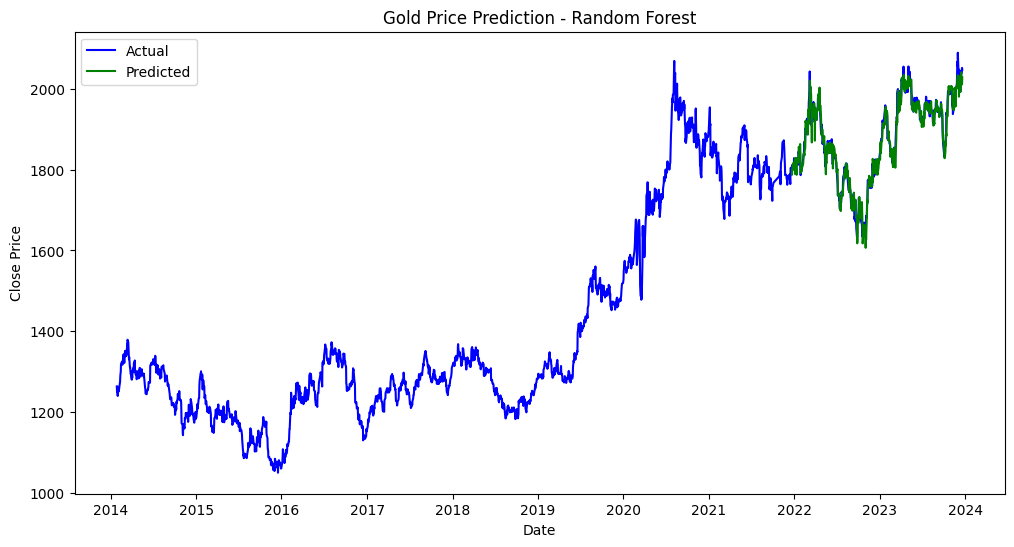

In [765]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Create a figure with specified size
plt.figure(figsize=(12,6))

# Plot the actual closing prices (blue line)
plt.plot(df.index, df['Close'], label='Actual', color='blue')

# Plot the predicted closing prices from Random Forest (red line)
plt.plot(test.index, y_pred, label='Predicted', color='green')

# Add title and axis labels
plt.title('Gold Price Prediction - Random Forest')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Add legend to distinguish actual vs predicted
plt.legend()

# Display the plot
plt.show()


## 📈 Gold Price Prediction – Random Forest Insight

- The plot compares **actual gold prices** (blue) with **predicted values** (red) over time  
- The model begins predicting around the test period (2021 onward), using lagged features from earlier prices  
- The predicted line follows the general **upward trend** of actual prices, capturing broad movements  
- However, some **short-term fluctuations** are missed, indicating that Random Forest may smooth out volatility  
📊 Overall, the model performs well in trend estimation but may benefit from additional features to improve precision


In [766]:
from sklearn.metrics import mean_squared_error

# 1. Calculate the Mean Squared Error (MSE) between actual and predicted values
mse = mean_squared_error(y_test, y_pred)

# 2. Calculate Root Mean Squared Error (RMSE) for easier interpretation (same unit as target variable)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

# 3. Calculate Error percentage relative to the mean of actual values
#    This shows how large the RMSE is compared to the average gold price
error_percent = rmse / np.mean(y_test) * 100
print(f'Error: {error_percent:.2f}%')

# 4. Calculate Accuracy as 100% minus the error percentage
print(f'Accuracy: {100 - error_percent:.2f}%')


RMSE: 20.380593903599983
Error: 1.09%
Accuracy: 98.91%


## 📉 Random Forest Forecast Evaluation

1. **Mean Squared Error (MSE)** is computed to measure the average squared difference between predicted and actual gold prices  
2. **Root Mean Squared Error (RMSE)** is derived by taking the square root of MSE, giving error in original price units  
3. **Error Percentage** compares RMSE to the mean of actual prices, providing a scale-independent metric  
4. **Approximate Accuracy** is calculated as `100 − Error (%)`, offering a quick view of model performance

✅ These metrics help assess how well the Random Forest model predicts gold prices based on lag features
